## Statistical NLP Project Submission

Project Description    Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles, etc. is written every second. It is a challenge to predict the information about the writer without knowing about him/her.  
 
We are going to create a classifier that predicts multiple features of the author of a given text. We have designed it as a Multilabel classification problem.   

In [5]:
#Import basic libraries needed for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Load the dataset

In [6]:
#Load data into pandas dataframe

#Lets load only a sample no of rows now considering the space on the machine

blog_df = pd.read_csv("blog-authorship-corpus.zip",nrows=50000)

In [7]:
#Backup copy in case needed without having to read the data from disk again
bkup = blog_df.copy()

In [8]:
#Use when needed and comment back
#blog_df = bkup.copy()

In [9]:
#sanity
blog_df.sample(5)

,id,gender,age,topic,sign,date,text
16907,3618432,female,25,indUnk,Cancer,"18,June,2004",I dreamt last night that I drove up to ...
14899,727002,male,23,Internet,Leo,"10,October,2003","on an unrelated note, i feel ever..."
954,3359005,male,14,Student,Scorpio,"05,July,2004",urlLink Dennis Frentsos and E...
25359,3635310,female,27,Manufacturing,Gemini,"05,May,2003",Hello Everyone - I went to the podiatr...
30169,3951537,female,16,Student,Virgo,"16,July,2004",i have much to speak of on this night. ...


In [10]:
#Convert date to proper date string for manipulation if needed later
blog_df.date = pd.to_datetime(blog_df.date,errors="coerce",infer_datetime_format=True)

In [11]:
#Shape of the data set
blog_df.shape

(50000, 7)

In [12]:
#Check the basic info of the dataset now
blog_df.info()

#Age does not have any null.
#Need to check the values of all the others as part of exploration down the line

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
id        50000 non-null int64
gender    50000 non-null object
age       50000 non-null int64
topic     50000 non-null object
sign      50000 non-null object
date      49535 non-null datetime64[ns]
text      50000 non-null object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 2.7+ MB


In [13]:
#Check the distribution of the gender of this sample
blog_df.gender.value_counts()

male      25815
female    24185
Name: gender, dtype: int64

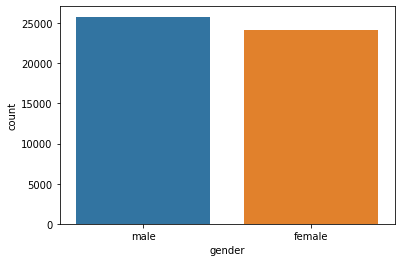

In [14]:
#Visualize the gender distribution
sns.countplot(blog_df.gender)

#almost equal representation 

In [15]:
#Lets check the age distribution
blog_df.age.value_counts()

17    6859
24    5746
23    5518
16    4156
27    4094
15    3508
35    3365
26    2869
25    2837
14    2043
36    1985
34    1886
33    1654
13     745
39     412
41     394
46     330
48     318
37     310
47     206
38     196
40     192
43     150
42      96
45      93
44      38
Name: age, dtype: int64

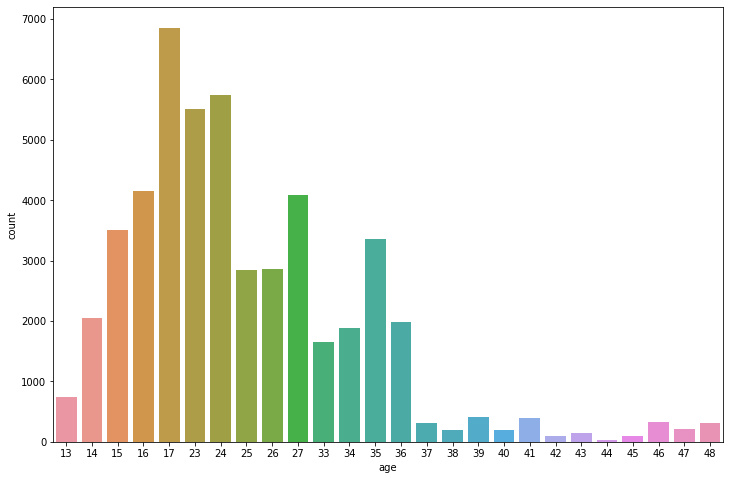

In [16]:
#Lets visualize the distribution
plt.figure(figsize=(12,8))
sns.countplot(blog_df.age)

#We can see that the distribution in this sample is heavily skewed towards younger population

In [17]:
#Lets check the topic distribution
blog_df.topic.value_counts()

#We can see that indUnk (which is basicaly unknown) dominates in this particular sample
#..not sure on the overall dataset
#In this sample Student topic is also seen more. Age distribution correlates with this info
#We can also see that some of the topics are underrepresented like Environment and Technology. 
#This will be a challenge for final classification

indUnk                     17560
Student                    10660
Technology                  4379
Education                   2646
Arts                        1817
Fashion                     1805
Communications-Media        1603
Internet                    1420
Engineering                 1402
Science                      705
Government                   599
Non-Profit                   491
Manufacturing                441
BusinessServices             416
Marketing                    414
Accounting                   364
Law                          308
Museums-Libraries            285
Banking                      283
Advertising                  273
Religion                     258
Consulting                   243
Publishing                   207
Transportation               196
Military                     194
LawEnforcement-Security      125
Sports-Recreation            120
Automotive                   116
Biotech                      101
InvestmentBanking             85
HumanResou

In [18]:
#Lets check some samples where the topic is shown as unknown which is the majority
blog_df[blog_df.topic == "indUnk"].sample(5)

#Key decision is if we want to keep these records.
#Lets keep them now and see if we can predict the other characteristics of the person like sign, age and gender

,id,gender,age,topic,sign,date,text
42263,888601,female,24,indUnk,Libra,2004-05-23,"I'm sweating. I hate to sweat, especia..."
13525,1976124,male,25,indUnk,Libra,2003-11-26,I'm back again. An odd thing hap...
13885,480727,male,23,indUnk,Pisces,2004-06-02,"arghhh,..had a bump on my right e..."
32189,1538911,female,35,indUnk,Libra,2004-07-14,Had to call the cops again tonight. Ou...
44754,1098541,male,15,indUnk,Capricorn,2004-03-05,WE INTERUPT THIS REGULAR BLOG ENTRY...


In [19]:
#Lets check the sign
blog_df.sign.value_counts()

#Seems to be dominated by Aries in this sample heavily..this could cause some prediction challenges.

Aries          7795
Aquarius       4784
Cancer         4589
Sagittarius    4571
Libra          4378
Pisces         4142
Leo            3904
Capricorn      3819
Taurus         3390
Scorpio        3243
Virgo          2827
Gemini         2558
Name: sign, dtype: int64

In [20]:
#Check the year of blogs..most of the info in this sample is from 2004
blog_df.groupby(blog_df.date.dt.year).id.aggregate("count")

date
1999.0        5
2000.0       48
2001.0      215
2002.0     2083
2003.0     7912
2004.0    39272
Name: id, dtype: int64

In [21]:
#Check length of the text values which is the key feature for this problem
blog_df.text.str.len().sort_values()

#Length of the blog posts is very varied with very low # of words to very high

8877          4
48254         4
19259         4
45986         7
45952         7
35369         8
35367         8
35365         8
35366         8
45958         8
46006         8
31554         9
17463         9
31591         9
31624        10
25263        10
38395        11
38457        11
38483        11
18208        11
38412        11
38469        11
45189        11
38447        11
18189        11
5239         12
5030         12
5073         12
4940         12
27794        12
          ...  
9805      22495
28297     22624
27773     23094
30638     23887
21914     24051
48191     24887
17907     25315
17908     25315
2         25467
30508     25505
32127     26012
6107      26328
28264     26597
12500     26837
27301     27654
26623     27667
13310     28055
3629      28995
12410     30246
1848      30737
37144     31617
9983      44747
6106      48828
11684     48977
42927     49057
18513     61013
18512     61922
16760     68545
16759    119813
31751    321278
Name: text, Length: 5000

In [22]:
blog_df.text.str.len().describe()

#We can see there are some very huge ones and some very low ones

count     50000.000000
mean       1130.585300
std        2216.412948
min           4.000000
25%         237.000000
50%         662.000000
75%        1460.000000
max      321278.000000
Name: text, dtype: float64

In [23]:
#Lets see how many of them have less than 50 chars
blog_df[blog_df.text.str.len() <= 50].id.count()

1969

In [24]:
#Sample records with less than 50 chars
blog_df[blog_df.text.str.len() <= 50].sample(5)

,id,gender,age,topic,sign,date,text
5048,1103575,female,17,indUnk,Scorpio,2003-09-24,I blogged out on xanga... silly Rachel....
3501,589736,male,35,Technology,Aries,2004-08-05,it is time for me to move on
47683,988941,female,17,Student,Capricorn,2004-02-21,Oh and Matt: BLOG.
2237,589736,male,35,Technology,Aries,2004-08-05,i love madonna!
47852,988941,female,17,Student,Capricorn,2004-04-03,I tidied my room


In [25]:
#Lets see how many of them have less than 100 chars
blog_df[blog_df.text.str.len() <= 100].id.count()

#That is almost 10% of the sample

5697

In [26]:
#Sample records with less text
blog_df[blog_df.text.str.len() <= 100].sample(5)

,id,gender,age,topic,sign,date,text
48560,3415693,male,14,indUnk,Leo,2004-08-06,"HEAVENS TO BETSEY, iTUNES WO..."
14909,727002,male,23,Internet,Leo,2003-11-15,urlLink CONSPIRACY!
28510,1103016,male,16,Student,Gemini,2004-01-30,I turned into a Blue Bruce.
14904,727002,male,23,Internet,Leo,2003-11-23,My life is rated R. What is y...
42496,3968157,male,26,indUnk,Leo,2004-07-29,urlLink raza raza


In [27]:
#Lets clean up the text and then check the length. We will drop rows which have zero or very less words to be useful

### Preprocess rows of the “text” column

a. Remove unwanted characters 
b. Convert text to lowercase 
c. Remove unwanted spaces 
d. Remove stopwords

In [28]:
#Lets check some sample text values
list(blog_df.text.sample(5))

["             Age: 32 Unit: Army School of Ammunition, Royal Logistic Corps Hometown: Romsey, England Details: Killed during an explosive ordnance disposal operation in southern Iraq on March 31, 2003  Articles:  urlLink #1 ,  urlLink #2 ,  urlLink #3 ,  urlLink #4 ,  urlLink #5   There may be more, but that's the first page of the google search.          ",
 "       He drives me crazy sometimes.&nbsp; I wake up and his hands are on me and his back is moving above me and he smells like wet dirt and musk.&nbsp; I can't help but fall into him because he is still the sexiest man I've ever seen.&nbsp; I'm still far too in love with him.&nbsp; I'm still always waiting for him.&nbsp; I still need the sound of his voice and I need to hear that I'm beautiful and I need to hear him laugh.&nbsp; So when he doesn't I immediately think it is me, it is us.&nbsp; And that is my own ridiculous insecurities.&nbsp;      ",
 "        Timing is everything  I have my share of good days and bad days.  But

In [29]:
##We can see the references to urlLink which should be removed
##We can see additional spaces, names, mixed case, special characters etc
##We can also see lot of spelling issues which could be a problem - for future how to correct this
##Do we need numbers? since we are only looking for classification..
#Should we attempt to do NER and remove/keep them? - For future

In [30]:
#get nltk for stop words
import nltk
from nltk.corpus import stopwords

In [31]:
#Get the list of stopwords in English from NLTK corpus
stoplist = stopwords.words('english')

#Add custom stopwords to the list
mystop_words = ["urllink"]

stoplist.extend(mystop_words)

In [32]:
#Utility method to tokenize a sentence and remove stop words
def remove_stop_words(sentence):
    tokens = nltk.word_tokenize(sentence)
    clean_tokens = [tokens for tokens in tokens if tokens not in stoplist]
    clean_sentenance = " ".join(clean_tokens)
    return clean_sentenance

In [33]:
#sanity check
s = list(blog_df.sample().text)[0]
s

"       September 24, 2002   Bummed around until 10:30 this morning.  Then I had to get up and take the biddy to the cardiologist for a day full of tests.  I missed my spine scan and endocrinologist appointments; I'm never going to feel better if I don't stop pissing around!    Per usual, I didn't get anything in the mail today.  I did sell a pair of DM Chukka boots, though; that rocks.  I had an inquiry about the Marc Jacobs jeans I have on eBay; hopefully I'll sell another pair of those too.  I don't think $40 is too bad for a brand new pair of $140 jeans.   The landlords are still driving me crazy with their damn kids and the husband's temper tantrums.  It'd be nice if I could get a full night sleep.  Alas that's not going to happen until we move or a mysterious accident takes out the bottom half of the house.  I have a special place in hell reserved just for me...   Yet again, people piss me off.  Nothing new there...   I did receive a really cool DM poster yesterday; 3 weeks after

In [34]:
#sanity
remove_stop_words(s)

"September 24 , 2002 Bummed around 10:30 morning . Then I get take biddy cardiologist day full tests . I missed spine scan endocrinologist appointments ; I 'm never going feel better I n't stop pissing around ! Per usual , I n't get anything mail today . I sell pair DM Chukka boots , though ; rocks . I inquiry Marc Jacobs jeans I eBay ; hopefully I 'll sell another pair . I n't think $ 40 bad brand new pair $ 140 jeans . The landlords still driving crazy damn kids husband 's temper tantrums . It 'd nice I could get full night sleep . Alas 's going happen move mysterious accident takes bottom half house . I special place hell reserved ... Yet , people piss . Nothing new ... I receive really cool DM poster yesterday ; 3 weeks I paid . Luckily 's cool I paid $ 13 . The 18 eye snakeskin Docs auction I planning winning ended early . Why list something 're sure want sell ? I win cool pair rose pattern boots $ 25 , kinda makes . The seller also agreed ship via UPS account saves $ 6 shipping !

In [35]:
#Utility function to convert items to lower case
def lowercase(sentence):
    return sentence.lower()

In [36]:
#sanity check
lowercase(s)

"       september 24, 2002   bummed around until 10:30 this morning.  then i had to get up and take the biddy to the cardiologist for a day full of tests.  i missed my spine scan and endocrinologist appointments; i'm never going to feel better if i don't stop pissing around!    per usual, i didn't get anything in the mail today.  i did sell a pair of dm chukka boots, though; that rocks.  i had an inquiry about the marc jacobs jeans i have on ebay; hopefully i'll sell another pair of those too.  i don't think $40 is too bad for a brand new pair of $140 jeans.   the landlords are still driving me crazy with their damn kids and the husband's temper tantrums.  it'd be nice if i could get a full night sleep.  alas that's not going to happen until we move or a mysterious accident takes out the bottom half of the house.  i have a special place in hell reserved just for me...   yet again, people piss me off.  nothing new there...   i did receive a really cool dm poster yesterday; 3 weeks after

In [37]:
#import re for patten matching
import re

In [38]:
#utility function to remove special characters
#Adding a toggle for keeping or removing numbers
#Should we replace special chars with space or blanks? Both create problem..lets keep blank for now since probably
#more better
def remove_special_chars(sentence,nos=False):
    if nos:
        pattern = r'[^a-zA-Z0-9\s]'
    else:
        pattern = r'[^a-zA-Z\s]'
    clean_sentence = re.sub(pattern,'',sentence)
    return clean_sentence

In [39]:
s

"       September 24, 2002   Bummed around until 10:30 this morning.  Then I had to get up and take the biddy to the cardiologist for a day full of tests.  I missed my spine scan and endocrinologist appointments; I'm never going to feel better if I don't stop pissing around!    Per usual, I didn't get anything in the mail today.  I did sell a pair of DM Chukka boots, though; that rocks.  I had an inquiry about the Marc Jacobs jeans I have on eBay; hopefully I'll sell another pair of those too.  I don't think $40 is too bad for a brand new pair of $140 jeans.   The landlords are still driving me crazy with their damn kids and the husband's temper tantrums.  It'd be nice if I could get a full night sleep.  Alas that's not going to happen until we move or a mysterious accident takes out the bottom half of the house.  I have a special place in hell reserved just for me...   Yet again, people piss me off.  Nothing new there...   I did receive a really cool DM poster yesterday; 3 weeks after

In [40]:
#sanity check
remove_special_chars(s)

'       September     Bummed around until  this morning  Then I had to get up and take the biddy to the cardiologist for a day full of tests  I missed my spine scan and endocrinologist appointments Im never going to feel better if I dont stop pissing around    Per usual I didnt get anything in the mail today  I did sell a pair of DM Chukka boots though that rocks  I had an inquiry about the Marc Jacobs jeans I have on eBay hopefully Ill sell another pair of those too  I dont think  is too bad for a brand new pair of  jeans   The landlords are still driving me crazy with their damn kids and the husbands temper tantrums  Itd be nice if I could get a full night sleep  Alas thats not going to happen until we move or a mysterious accident takes out the bottom half of the house  I have a special place in hell reserved just for me   Yet again people piss me off  Nothing new there   I did receive a really cool DM poster yesterday  weeks after I paid for it  Luckily its cool and I only paid  fo

In [41]:
#utility function to remove additional space
def remove_extra_spaces(sentence):
    pattern = r'\s+'
    clean_sentence = re.sub(pattern,' ',sentence)
    return clean_sentence

In [42]:
#sanity check
remove_extra_spaces(s)

" September 24, 2002 Bummed around until 10:30 this morning. Then I had to get up and take the biddy to the cardiologist for a day full of tests. I missed my spine scan and endocrinologist appointments; I'm never going to feel better if I don't stop pissing around! Per usual, I didn't get anything in the mail today. I did sell a pair of DM Chukka boots, though; that rocks. I had an inquiry about the Marc Jacobs jeans I have on eBay; hopefully I'll sell another pair of those too. I don't think $40 is too bad for a brand new pair of $140 jeans. The landlords are still driving me crazy with their damn kids and the husband's temper tantrums. It'd be nice if I could get a full night sleep. Alas that's not going to happen until we move or a mysterious accident takes out the bottom half of the house. I have a special place in hell reserved just for me... Yet again, people piss me off. Nothing new there... I did receive a really cool DM poster yesterday; 3 weeks after I paid for it. Luckily it

In [43]:
##Lets try out Lemmatization as well
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rejimonr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [44]:
#Utility function to lemmatize sentences
def word_lemmatize(sentence):
    wnl = WordNetLemmatizer()
    tokens = nltk.word_tokenize(sentence)
    clean_sentence =  " ".join([wnl.lemmatize(token) for token in tokens])
    return clean_sentence

In [45]:
s

"       September 24, 2002   Bummed around until 10:30 this morning.  Then I had to get up and take the biddy to the cardiologist for a day full of tests.  I missed my spine scan and endocrinologist appointments; I'm never going to feel better if I don't stop pissing around!    Per usual, I didn't get anything in the mail today.  I did sell a pair of DM Chukka boots, though; that rocks.  I had an inquiry about the Marc Jacobs jeans I have on eBay; hopefully I'll sell another pair of those too.  I don't think $40 is too bad for a brand new pair of $140 jeans.   The landlords are still driving me crazy with their damn kids and the husband's temper tantrums.  It'd be nice if I could get a full night sleep.  Alas that's not going to happen until we move or a mysterious accident takes out the bottom half of the house.  I have a special place in hell reserved just for me...   Yet again, people piss me off.  Nothing new there...   I did receive a really cool DM poster yesterday; 3 weeks after

In [46]:
word_lemmatize(s)

"September 24 , 2002 Bummed around until 10:30 this morning . Then I had to get up and take the biddy to the cardiologist for a day full of test . I missed my spine scan and endocrinologist appointment ; I 'm never going to feel better if I do n't stop pissing around ! Per usual , I did n't get anything in the mail today . I did sell a pair of DM Chukka boot , though ; that rock . I had an inquiry about the Marc Jacobs jean I have on eBay ; hopefully I 'll sell another pair of those too . I do n't think $ 40 is too bad for a brand new pair of $ 140 jean . The landlord are still driving me crazy with their damn kid and the husband 's temper tantrum . It 'd be nice if I could get a full night sleep . Alas that 's not going to happen until we move or a mysterious accident take out the bottom half of the house . I have a special place in hell reserved just for me ... Yet again , people piss me off . Nothing new there ... I did receive a really cool DM poster yesterday ; 3 week after I paid

In [47]:
#Utility function to consolidate all clean up actions
def text_clean(sentence,lower=False,stopwords_removal=False,extra_spaces=True,special_chars=False,lemmatize=False):
    clean_sentence = sentence
    if lower:
        clean_sentence = lowercase(clean_sentence)
    if special_chars:
        clean_sentence = remove_special_chars(clean_sentence)
    if lemmatize:
        clean_sentence = word_lemmatize(clean_sentence)
    if stopwords_removal:
        clean_sentence = remove_stop_words(clean_sentence)
    if extra_spaces:
        clean_sentence = remove_extra_spaces(clean_sentence)
        
    return clean_sentence
    

In [48]:
#Sanity check
s = list(blog_df.sample().text)[0]
s

'       Before Jaelyn was born our lawyers advised us not to bring her home until after the forty-eight hours of maternal consent had passed.  Too many custody cases that they had seen, too many broken hearted adoptive parents, too much risk – they said – to take her home after the 12 hour wait that the hospital mandated.   In _The Great Divorce_, the narrator talks about all the reasons that humans choose to turn back to the small dark dingy city that they came from instead of growing into and up-in and through live in the dangerously beautiful new world.  One of the stories he tells is of a mother who is so wrapped up in the lives of her children that she cannot bear to let go of them so that she may enter the Great New World.  Parental love, like all the greatest parts of being human seems like one of the most dangerous and difficult endeavors.  How do we love without strings attached?  How can we possibly invest every hope and dream into these people and then love them just as full

In [49]:
text_clean(s,lower=True,stopwords_removal=True,extra_spaces=True,special_chars=True,lemmatize=True)

'jaelyn wa born lawyer advised u bring home fortyeight hour maternal consent passed many custody case seen many broken hearted adoptive parent much risk said take home hour wait hospital mandated great divorce narrator talk reason human choose turn back small dark dingy city came instead growing upin live dangerously beautiful new world one story tell mother wrapped life child bear let go may enter great new world parental love like greatest part human seems like one dangerous difficult endeavor love without string attached possibly invest every hope dream people love fully need choose dream cant understand see question struggled college student receiving end constricting love decided bring home anyway hour felt like one top courageous moment life two month wait miscarriage brokenness brings two year infertility read blog inspired question bravest thing ever done seems like one question push u tell best story look admire mostin become something courageous peace'

In [50]:
#Apply the clean up method on the data set

blog_df.text = blog_df.text.apply(lambda x: text_clean(x,
                                                       lower=True,
                                                       stopwords_removal=True,
                                                       extra_spaces=True,
                                                       special_chars=True,
                                                       lemmatize=True))

In [51]:
###Lets check the text lengths now after the clean up activities
blog_df.text.str.len().describe()

#We can see overall text lengths have reduced from the cleaning
#Interestingly some of the entries have became zero

count     50000.000000
mean        675.762600
std        1325.822541
min           0.000000
25%         130.000000
50%         388.000000
75%         880.000000
max      184415.000000
Name: text, dtype: float64

In [52]:
#Lets check the records where no text is available after cleaning
blog_df[blog_df.text.str.len() == 0].id.count()

404

In [53]:
#Check the sample records
blog_df[blog_df.text.str.len() == 0].sample(5)

,id,gender,age,topic,sign,date,text
36024,4060663,female,27,indUnk,Sagittarius,2004-08-08,
32726,1543875,female,25,Education,Cancer,2004-07-26,
31624,2161822,male,15,Student,Leo,2004-08-04,
21273,3922848,male,17,Arts,Leo,2004-07-14,
36220,3660006,female,16,Student,Capricorn,2004-07-27,


In [54]:
#We will drop these records for now
blog_df = blog_df[blog_df.text.str.len() != 0]

In [55]:
#Sanity check
blog_df[blog_df.text.str.len() == 0].id.count()

0

In [56]:
#Check the number of records which have very less text
text_length = 20
blog_df[blog_df.text.str.len() <= text_length].id.count()

2290

In [57]:
#Sample records where text is very less
blog_df[blog_df.text.str.len() <= text_length].sample(5)

,id,gender,age,topic,sign,date,text
43147,3474281,male,14,Museums-Libraries,Scorpio,2004-06-08,come photo
46968,988941,female,17,Student,Capricorn,2003-05-08,yep especially
14848,727002,male,23,Internet,Leo,2003-06-09,oo oo
3076,589736,male,35,Technology,Aries,2004-08-05,liked cookie story
46891,988941,female,17,Student,Capricorn,2003-04-01,jo hereit boring bye


In [58]:
#Check distribution
blog_df[blog_df.text.str.len() <= text_length].text.str.len().describe()

count    2290.000000
mean       12.375983
std         5.071756
min         1.000000
25%         9.000000
50%        13.000000
75%        17.000000
max        20.000000
Name: text, dtype: float64

In [59]:
#Lets try removing these records for now and check
blog_df = blog_df[blog_df.text.str.len() > text_length]

In [60]:
#Sanity check
blog_df[blog_df.text.str.len() <= text_length].id.count()

0

In [61]:
#Check distribution
blog_df.text.str.len().describe()

count     47306.000000
mean        713.647085
std        1353.244682
min          21.000000
25%         163.000000
50%         427.000000
75%         919.000000
max      184415.000000
Name: text, dtype: float64

### Prep dataset
As we want to make this into a multi-label classification problem, you are required to merge all the label columns together, so that we have all the labels together for a particular sentence (7.5 points) a. Label columns to merge: “gender”, “age”, “topic”, “sign” b. After completing the previous step, there should be only two columns in your data frame i.e. “text” and “labels” 

In [62]:
#Get a copy to proceed further
clean_blog_df = blog_df.copy()

In [63]:
clean_blog_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47306 entries, 0 to 49999
Data columns (total 7 columns):
id        47306 non-null int64
gender    47306 non-null object
age       47306 non-null int64
topic     47306 non-null object
sign      47306 non-null object
date      46857 non-null datetime64[ns]
text      47306 non-null object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 2.9+ MB


In [64]:
#Merge gender,age,topic,sign to form the labels
clean_blog_df["labels"] = clean_blog_df[["gender","age","topic","sign"]].apply(lambda row: list(row),axis=1)

In [65]:
#Sanity
clean_blog_df.sample()

,id,gender,age,topic,sign,date,text,labels
20423,3460671,male,27,Banking,Sagittarius,2004-05-29,finding website google search naughty little m...,"[male, 27, Banking, Sagittarius]"


In [66]:
#Remove the other columns and retain only text and labels
clean_blog_df.drop(["id","gender","age","topic","sign","date"],axis=1,inplace=True)

In [67]:
#Sanity
clean_blog_df.sample()

,text,labels
20530,reality tv tomorrow final rose ceremony two ba...,"[female, 27, indUnk, Aries]"


### Separate features and labels, and split the data into training and testing 

In [68]:
#Lets split the dataframe into features and labels
features = clean_blog_df["text"]
labels = clean_blog_df["labels"]

In [69]:
#sanity check
features.sample()

32336    wonderful hitchens piece value gay marriage be...
Name: text, dtype: object

In [70]:
#sanity check
labels.sample()

18105    [male, 16, Student, Pisces]
Name: labels, dtype: object

In [71]:
#Split the dataset into training and test
#import train_test_split
from sklearn.model_selection import train_test_split

In [72]:
#We will split to have 20% data
features_train, features_test, labels_train, labels_test = train_test_split(features,labels,test_size=0.2,random_state=5)

In [73]:
#Sanity check
print("Train Features",features_train.shape)
print("Test Features",features_test.shape)
print("Train Labels",labels_train.shape)
print("Test Labels",labels_test.shape)

Train Features (37844,)
Test Features (9462,)
Train Labels (37844,)
Test Labels (9462,)


### Vectorize the features 

a. Create a Bag of Words using count vectorizer
    i. Use ngram_range=(1, 2) 
    ii. Vectorize training and testing features b. Print the term-document matrix

b. Print the term-document matrix 

In [74]:
#Import countvectorizer from sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [75]:
#Initialize with ngram as 1,2
cvect = CountVectorizer(ngram_range=(1,2))

In [76]:
#Fit on the training set
features_train_dtm = cvect.fit_transform(features_train)

In [77]:
#Check the vocab and size
print(len(cvect.vocabulary_))
cvect.vocabulary_

2426702


{'hey': 951863,
 'everyone': 662121,
 'new': 1423842,
 'picture': 1573564,
 'officially': 1470394,
 'tonight': 2165711,
 'cell': 318435,
 'group': 882459,
 'christmas': 350540,
 'party': 1533611,
 'well': 2326294,
 'many': 1283348,
 'others': 1503886,
 'go': 840251,
 'wwwpbasecomtimkang': 2397956,
 'check': 334297,
 'saw': 1806824,
 'return': 1754223,
 'king': 1124537,
 'wednesday': 2318592,
 'night': 1435625,
 'wa': 2272345,
 'expected': 678403,
 'thoroughly': 2126904,
 'satisfied': 1803938,
 'im': 1013895,
 'still': 1999724,
 'scifi': 1822990,
 'guy': 892526,
 'series': 1855870,
 'definitely': 504943,
 'take': 2064826,
 'cake': 282756,
 'best': 195936,
 'movie': 1375050,
 'trilogy': 2191039,
 'hey everyone': 952092,
 'everyone new': 662907,
 'new picture': 1425730,
 'picture officially': 1574477,
 'officially picture': 1470542,
 'picture tonight': 1574902,
 'tonight cell': 2165848,
 'cell group': 318509,
 'group christmas': 882651,
 'christmas party': 350752,
 'party well': 1534883,


In [78]:
#Check the shape of the training dtm now
features_train_dtm.shape

#Large number of features

(37844, 2426702)

In [79]:
#Transform the test set as well
features_test_dtm = cvect.transform(features_test)

In [80]:
#Check shape
features_test_dtm.shape

(9462, 2426702)

In [81]:
#Print the DTM. This will be a sparse matrix
print(features_train_dtm)

  (0, 951863)	1
  (0, 662121)	1
  (0, 1423842)	1
  (0, 1573564)	2
  (0, 1470394)	1
  (0, 2165711)	1
  (0, 318435)	1
  (0, 882459)	1
  (0, 350540)	1
  (0, 1533611)	1
  (0, 2326294)	1
  (0, 1283348)	1
  (0, 1503886)	1
  (0, 840251)	1
  (0, 2397956)	1
  (0, 334297)	1
  (0, 1806824)	1
  (0, 1754223)	1
  (0, 1124537)	1
  (0, 2318592)	1
  (0, 1435625)	1
  (0, 2272345)	2
  (0, 678403)	1
  (0, 2126904)	1
  (0, 1803938)	1
  :	:
  (37843, 1564133)	1
  (37843, 1090600)	1
  (37843, 78458)	1
  (37843, 1090280)	1
  (37843, 914779)	1
  (37843, 178178)	1
  (37843, 639452)	1
  (37843, 970012)	1
  (37843, 914817)	1
  (37843, 14734)	1
  (37843, 2174001)	1
  (37843, 2127893)	1
  (37843, 813978)	1
  (37843, 907649)	1
  (37843, 2210635)	1
  (37843, 2385847)	1
  (37843, 928260)	1
  (37843, 598303)	1
  (37843, 1256610)	1
  (37843, 627936)	1
  (37843, 985688)	1
  (37843, 959372)	1
  (37843, 145441)	1
  (37843, 2383509)	1
  (37843, 914822)	1


### Create a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label

In [82]:
#We will use defaultdict for this
from collections import defaultdict

In [83]:
#Intialize with int type as we want to capture count
label_counts = defaultdict(int)

In [84]:
#Iterate over the labels to generate the dict object
#We will use the labels before split
for row in labels:
    for element in row:
        label_counts[element] += 1 #increment if found

In [85]:
#check label counts now.
#First convert to regular dict
label_counts = dict(label_counts)

label_counts

{'male': 24209,
 15: 3339,
 'Student': 10064,
 'Leo': 3574,
 33: 1605,
 'InvestmentBanking': 84,
 'Aquarius': 4668,
 'female': 23097,
 14: 1962,
 'indUnk': 16836,
 'Aries': 7132,
 25: 2730,
 'Capricorn': 3577,
 17: 6398,
 'Gemini': 2342,
 23: 5219,
 'Non-Profit': 480,
 'Cancer': 4404,
 'Banking': 280,
 37: 297,
 'Sagittarius': 4389,
 26: 2703,
 24: 5539,
 'Scorpio': 3065,
 27: 3950,
 'Education': 2564,
 45: 91,
 'Engineering': 1342,
 'Libra': 4223,
 'Science': 654,
 34: 1859,
 41: 392,
 'Communications-Media': 1395,
 'BusinessServices': 397,
 'Sports-Recreation': 118,
 'Virgo': 2746,
 'Taurus': 3213,
 'Arts': 1769,
 'Pisces': 3973,
 44: 37,
 16: 3909,
 'Internet': 1279,
 'Museums-Libraries': 275,
 'Accounting': 349,
 39: 389,
 35: 2994,
 'Technology': 3960,
 36: 1890,
 'Law': 300,
 46: 308,
 'Consulting': 190,
 'Automotive': 116,
 42: 92,
 'Religion': 243,
 13: 728,
 'Fashion': 1718,
 38: 188,
 43: 148,
 'Publishing': 203,
 40: 182,
 'Marketing': 399,
 'LawEnforcement-Security': 120,
 

In [86]:
#Check the length of the dict keys to find the unique labels
len(label_counts.keys())

80

In [87]:
#There are 80 labels

### Transform the labels 

As we have noticed before, in this task each example can have multiple tags. To deal with such kind of prediction, we need to transform labels in a binary form and the prediction will be a mask of 0s and 1s. For this purpose, it is convenient to use MultiLabelBinarizer from sklearn a. Convert your train and test labels using MultiLabelBinarizer 

In [88]:
#get binarizer from sklearn
from sklearn.preprocessing import MultiLabelBinarizer

In [89]:
#Initialize the MLB
#We will feed the keys as the classes
mlb = MultiLabelBinarizer(classes=list(label_counts.keys()))

In [90]:
#fit and transform on training
#We will get the individual keys and enclose in array to avoid splitting by characters
labels_train_enc = mlb.fit_transform(labels_train)

In [91]:
#Transform test labels
labels_test_enc = mlb.transform(labels_test)

In [92]:
#Check the classes
mlb.classes_

array(['male', 15, 'Student', 'Leo', 33, 'InvestmentBanking', 'Aquarius',
       'female', 14, 'indUnk', 'Aries', 25, 'Capricorn', 17, 'Gemini', 23,
       'Non-Profit', 'Cancer', 'Banking', 37, 'Sagittarius', 26, 24,
       'Scorpio', 27, 'Education', 45, 'Engineering', 'Libra', 'Science',
       34, 41, 'Communications-Media', 'BusinessServices',
       'Sports-Recreation', 'Virgo', 'Taurus', 'Arts', 'Pisces', 44, 16,
       'Internet', 'Museums-Libraries', 'Accounting', 39, 35,
       'Technology', 36, 'Law', 46, 'Consulting', 'Automotive', 42,
       'Religion', 13, 'Fashion', 38, 43, 'Publishing', 40, 'Marketing',
       'LawEnforcement-Security', 'HumanResources', 'Telecommunications',
       'Military', 'Government', 'Transportation', 'Architecture',
       'Advertising', 47, 'Agriculture', 'Biotech', 'RealEstate',
       'Manufacturing', 48, 'Construction', 'Chemicals', 'Maritime',
       'Tourism', 'Environment'], dtype=object)

In [93]:
#shape of encoded train labels
labels_train_enc.shape

(37844, 80)

In [94]:
#sanity check
labels_train_enc

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [95]:
#shape of encoded train labels
labels_test_enc.shape

(9462, 80)

In [96]:
#sanity
labels_test_enc

array([[0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [97]:
#[str(x) for x in mlb.classes]

### Choose a classifier 

In this task, we suggest using the One-vs-Rest approach, which is implemented in OneVsRestClassifier class. In this approach k classifiers (= number of tags) are trained. As a basic classifier, use LogisticRegression. It is one of the simplest methods, but often it performs good enough in text classification tasks. It might take some time because the number of classifiers to train is large. 

In [98]:
#Lets import needed libs
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,f1_score,recall_score,precision_score
from sklearn.metrics import multilabel_confusion_matrix

In [99]:
#Initialize the base classifier

#We will start with Logistic Classifier
lr = LogisticRegression(solver='lbfgs')

In [100]:
#Initialize our onevsrest classifier with LR as the base estimator
clf = OneVsRestClassifier(estimator=lr)

In [101]:
features_train_dtm.shape

(37844, 2426702)

In [102]:
labels_train_enc.shape

(37844, 80)

### Fit the classifier, make predictions and get the accuracy 

In [104]:
#Train on the training features and labels
clf.fit(features_train_dtm,labels_train_enc)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [105]:
#Get the predictions
y_pred = clf.predict(features_test_dtm)

In [106]:
#sanity check
y_pred

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [107]:
#mlb.inverse_transform(y_pred)

In [108]:
#Overall Accuracy
print("Accuracy Score",clf.score(features_test_dtm,labels_test_enc))

Accuracy Score 0.13253012048192772


In [109]:
#Get Precison scores - again using the tree settings for averaging
avg = ["macro","micro","weighted"]
for a in avg:
    print(f'Precision ({a}) : {precision_score(labels_test_enc,y_pred,average=a,zero_division=0): 0.3f}')

Precision (macro) :  0.619
Precision (micro) :  0.734
Precision (weighted) :  0.720


In [110]:
#Get Recall scores - again using the tree settings for averaging
avg = ["macro","micro","weighted"]
for a in avg:
    print(f'Recall ({a}) : {recall_score(labels_test_enc,y_pred,average=a,zero_division=0): 0.3f}')

Recall (macro) :  0.186
Recall (micro) :  0.385
Recall (weighted) :  0.385


In [111]:
#Get F1 scores - We will compare macro, micro and weighted scores
avg = ["macro","micro","weighted"]
for a in avg:
    print(f'F1 Score ({a}) : {f1_score(labels_test_enc,y_pred,average=a): 0.3f}')


F1 Score (macro) :  0.269
F1 Score (micro) :  0.505
F1 Score (weighted) :  0.465


In [103]:
##Lets try out Hamming loss also
from sklearn.metrics import hamming_loss

In [113]:
print("Hamming Loss", hamming_loss(labels_test_enc,y_pred))

Hamming Loss 0.037720619319382795


In [114]:
##Confusion and classification matrix

In [115]:
#Confusion Matrix
print("Confusion Matrix")
multilabel_confusion_matrix(labels_test_enc,y_pred)

Confusion Matrix


array([[[3257, 1278],
        [1119, 3808]],

       [[8747,   53],
        [ 490,  172]],

       [[7179,  304],
        [1229,  750]],

       [[8712,   50],
        [ 633,   67]],

       [[9115,   22],
        [ 292,   33]],

       [[9442,    1],
        [  12,    7]],

       [[8481,   90],
        [ 589,  302]],

       [[3808, 1119],
        [1278, 3257]],

       [[9038,   27],
        [ 320,   77]],

       [[5419,  771],
        [1728, 1544]],

       [[7869,  161],
        [ 977,  455]],

       [[8865,   32],
        [ 515,   50]],

       [[8713,   39],
        [ 530,  180]],

       [[8019,  177],
        [ 879,  387]],

       [[8965,   27],
        [ 411,   59]],

       [[8351,   85],
        [ 788,  238]],

       [[9348,    3],
        [ 109,    2]],

       [[8530,   52],
        [ 690,  190]],

       [[9403,    2],
        [  53,    4]],

       [[9399,    2],
        [  59,    2]],

       [[8496,   44],
        [ 684,  238]],

       [[8863,   55],
        [ 46

In [104]:
##Difficult to interpret the confusion matrix. Lets add the class names for better visualization
class_names = [str(x) for x in mlb.classes]

In [117]:
#Classification Report

print("Classification Report")
print(classification_report(labels_test_enc,y_pred,zero_division=0,target_names=class_names))

Classification Report
                         precision    recall  f1-score   support

                   male       0.75      0.77      0.76      4927
                     15       0.76      0.26      0.39       662
                Student       0.71      0.38      0.49      1979
                    Leo       0.57      0.10      0.16       700
                     33       0.60      0.10      0.17       325
      InvestmentBanking       0.88      0.37      0.52        19
               Aquarius       0.77      0.34      0.47       891
                 female       0.74      0.72      0.73      4535
                     14       0.74      0.19      0.31       397
                 indUnk       0.67      0.47      0.55      3272
                  Aries       0.74      0.32      0.44      1432
                     25       0.61      0.09      0.15       565
              Capricorn       0.82      0.25      0.39       710
                     17       0.69      0.31      0.42      1266
  

#### We can clearly see that the imbalance in class representation is causing the recall and precision of certain classes to be extremely low
This causes the macro averages to be pulled down but micro average and weighted averages take into consideration this.
We can see that the precision itself is better but recall is very poor. The overall accuracy is not very useful in evaluating the model.
We can also see from the classification metrics how underepresented classes have performed poorly. 
Gender has good representation and has decent performance overall

Use of the full dataset with all the classes having sufficent examples could improve the recall and overall performance

### Print true label and predicted label for any five examples

In [118]:
#Get some samples from the test set
#Merge and take 2 samples
sample_df = pd.concat([features_test,labels_test],axis=1).sample(5)

In [119]:
#sanity
sample_df

,text,labels
47133,brilliant jo excellent news amusing picture to...,"[female, 17, Student, Capricorn]"
3590,eva dudetell didnt think head could really spi...,"[male, 35, Technology, Aries]"
28700,fineally got play christian like month day som...,"[male, 13, Student, Cancer]"
14056,yes ill send card dont think get time co kinda...,"[male, 23, indUnk, Pisces]"
17355,ive several question asked project blog bloggi...,"[female, 46, indUnk, Leo]"


In [120]:
#Get the true labels
sample_labels = sample_df["labels"]
sample_labels

47133    [female, 17, Student, Capricorn]
3590        [male, 35, Technology, Aries]
28700         [male, 13, Student, Cancer]
14056          [male, 23, indUnk, Pisces]
17355           [female, 46, indUnk, Leo]
Name: labels, dtype: object

In [121]:
#Get the text
sample_features = sample_df["text"]
sample_features

47133    brilliant jo excellent news amusing picture to...
3590     eva dudetell didnt think head could really spi...
28700    fineally got play christian like month day som...
14056    yes ill send card dont think get time co kinda...
17355    ive several question asked project blog bloggi...
Name: text, dtype: object

In [122]:
#Vectorize the text using the same process
sample_features_dtm = cvect.transform(sample_features)

In [123]:
#Sanity
print(sample_features_dtm)

  (0, 51687)	1
  (0, 72139)	3
  (0, 72268)	1
  (0, 241428)	1
  (0, 241759)	1
  (0, 256020)	1
  (0, 481258)	1
  (0, 588122)	1
  (0, 670566)	1
  (0, 670762)	1
  (0, 982169)	1
  (0, 1088044)	1
  (0, 1239641)	1
  (0, 1380586)	1
  (0, 1427356)	1
  (0, 1528095)	1
  (0, 1528751)	1
  (0, 1573564)	1
  (0, 1574898)	1
  (0, 2162210)	1
  (0, 2162220)	1
  (0, 2272345)	2
  (0, 2272629)	1
  (0, 2277054)	1
  (0, 2306962)	1
  :	:
  (4, 1270713)	1
  (4, 1271669)	1
  (4, 1482312)	1
  (4, 1486499)	1
  (4, 1594485)	1
  (4, 1594668)	1
  (4, 1646907)	1
  (4, 1651760)	2
  (4, 1651812)	1
  (4, 1652263)	1
  (4, 1675554)	2
  (4, 1675627)	1
  (4, 1676352)	1
  (4, 1705831)	1
  (4, 1706829)	1
  (4, 1863001)	1
  (4, 1863379)	1
  (4, 1909656)	1
  (4, 1909713)	1
  (4, 1942719)	1
  (4, 1943186)	1
  (4, 2044181)	1
  (4, 2127184)	1
  (4, 2128822)	1
  (4, 2157990)	1


In [124]:
#Predict using the predictor
sample_pred = clf.predict(sample_features_dtm)

In [125]:
#Check
sample_pred

array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0

In [126]:
#Lets do a reverse transofrm of this using mlb to get the actual values
sample_pred_labels = mlb.inverse_transform(sample_pred)

In [127]:
#Check sanity
sample_pred_labels

[('Student', 'female', 'Capricorn', 17),
 ('male',),
 ('female',),
 ('male',),
 ('female',)]

In [128]:
#DF for storing true and predicted labels
sample_results = pd.DataFrame(columns=["True Labels","Predicted Labels"])

In [129]:
#true sample labels
sample_results["True Labels"] = sample_labels

In [130]:
#predicted sample labels
sample_results["Predicted Labels"] = sample_pred_labels

In [131]:
#True and predicted for sample records
sample_results

#We can see that in this example some of the labels are correct while some are way off (and not even predicted)

,True Labels,Predicted Labels
47133,"[female, 17, Student, Capricorn]","(Student, female, Capricorn, 17)"
3590,"[male, 35, Technology, Aries]","(male,)"
28700,"[male, 13, Student, Cancer]","(female,)"
14056,"[male, 23, indUnk, Pisces]","(male,)"
17355,"[female, 46, indUnk, Leo]","(female,)"


### Lets try out multiple configurations of models and vectorizer to see if any improvements can be achieved

In [105]:
#####Function to try out different classifiers and algorithms
#X is cleaned and split test and train data set
#y is encoded labels
def test_model(X_train,X_test,y_train,y_test,
               vect=CountVectorizer(ngram_range=(1,2)),est=LogisticRegression(),
               sample_pred=False):
    
    #Fit and transform the word vectorizer on training features
    X_train_dtm = vect.fit_transform(X_train)
    
    print("Training features shape",X_train_dtm.shape)
    
    print("Length of vocab is",len(vect.vocabulary_))
    
    #Transform test features
    
    X_test_dtm = vect.transform(X_test)
    
    print("Test features shape",X_test_dtm.shape)
    
    #Build the onevsrest classifier
    clf = OneVsRestClassifier(estimator=est)
    
    #Fit on train features
    clf.fit(X_train_dtm,y_train)
    
    
    
    #Predict on test
    y_pred = clf.predict(X_test_dtm)
    
    print("Classification Metrics and Scores")
    print("Accuracy Score",clf.score(X_test_dtm,y_test))
    #Get Precison scores - again using the tree settings for averaging
    avg = ["macro","micro","weighted"]
    for a in avg:
        print(f'Precision ({a}) : {precision_score(y_test,y_pred,average=a,zero_division=0): 0.3f}')
        
    for a in avg:   
        print(f'Recall ({a}) : {recall_score(y_test,y_pred,average=a,zero_division=0): 0.3f}')
        
    for a in avg:
        print(f'F1 Score ({a}) : {f1_score(y_test,y_pred,average=a): 0.3f}')
        
    print("Hamming Loss", hamming_loss(labels_test_enc,y_pred))
        
    print("Classification Report")
    print(classification_report(y_test,y_pred,zero_division=0,target_names=class_names))
    
    if sample_pred:
        sample_df = pd.concat([features_test,labels_test],axis=1).sample(5)
        sample_labels = sample_df["labels"]
        sample_features = sample_df["text"]
        sample_features_dtm = vect.transform(sample_features)
        sample_pred = clf.predict(sample_features_dtm)
        sample_pred_labels = mlb.inverse_transform(sample_pred)
        sample_results = pd.DataFrame(columns=["True Labels","Predicted Labels"])
        sample_results["True Labels"] = sample_labels
        sample_results["Predicted Labels"] = sample_pred_labels
        print("Sample Predictions") #only in local notebook use display to get a pretty view
        display(sample_results)

#### Trial 1: MultinomialNB using default CountVectorizer parameters

In [106]:
#Test the models with various combinations
#Check with MultinomialNB as the base estimator
test_model(features_train,features_test,labels_train_enc,labels_test_enc,est=MultinomialNB())

Training features shape (37844, 2426702)
Length of vocab is 2426702
Test features shape (9462, 2426702)
Classification Metrics and Scores
Accuracy Score 0.02557598816317903
Precision (macro) :  0.406
Precision (micro) :  0.734
Precision (weighted) :  0.793
Recall (macro) :  0.039
Recall (micro) :  0.220
Recall (weighted) :  0.220
F1 Score (macro) :  0.055
F1 Score (micro) :  0.338
F1 Score (weighted) :  0.250
Hamming Loss 0.04299170365673219
Classification Report
                         precision    recall  f1-score   support

                   male       0.83      0.56      0.66      4927
                     15       0.96      0.04      0.08       662
                Student       0.91      0.10      0.17      1979
                    Leo       1.00      0.01      0.03       700
                     33       1.00      0.01      0.02       325
      InvestmentBanking       0.00      0.00      0.00        19
               Aquarius       0.94      0.13      0.23       891
           

In [127]:
##Multinomial did not perform as well as LR with the same configuration for this sample data set

#### Trial 2: MultinomialNB using CountVectorizer with min_df, max_df settings

In [99]:
#Test the models with various combinations
#Check with MultinomialNB as the base estimator

#Lets change some parameters of CV
cv = CountVectorizer(ngram_range=(1,2),min_df=0.01,max_df=0.95)
test_model(features_train,features_test,labels_train_enc,labels_test_enc,vect=cv,est=MultinomialNB(),sample_pred=True)

Training features shape (37844, 1424)
Length of vocab is 1424
Test features shape (9462, 1424)
Classification Metrics and Scores
Accuracy Score 0.0057070386810399495
Precision (macro) :  0.145
Precision (micro) :  0.281
Precision (weighted) :  0.337
Recall (macro) :  0.299
Recall (micro) :  0.380
Recall (weighted) :  0.380
F1 Score (macro) :  0.177
F1 Score (micro) :  0.323
F1 Score (weighted) :  0.348
Hamming Loss 0.07969245402663284
Classification Report
                         precision    recall  f1-score   support

                   male       0.67      0.58      0.62      4927
                     15       0.19      0.40      0.26       662
                Student       0.39      0.45      0.42      1979
                    Leo       0.13      0.12      0.12       700
                     33       0.15      0.31      0.20       325
      InvestmentBanking       0.10      0.74      0.17        19
               Aquarius       0.31      0.24      0.27       891
                 f

,True Labels,Predicted Labels
26208,"[male, 27, Law, Gemini]","(male, 33, InvestmentBanking, Aquarius, Aries,..."
18785,"[male, 23, Student, Gemini]","(male,)"
6862,"[male, 36, Fashion, Aries]","(male, Aries)"
27754,"[male, 16, indUnk, Sagittarius]","(male,)"
867,"[male, 17, Sports-Recreation, Capricorn]","(Student, female, Capricorn, 17, 27, Sports-Re..."


In [128]:
#The overall accuracy came down. Precision and recall was also affected. 
#The features were reduced significantly and this could have been the cause of this drop in learning

#### Trial 3: Logistic Regression using CountVectorizer with min_df, max_df settings

In [100]:
#Test the models with various combinations
#Check with LR as the base estimator

#Lets change some parameters of CV
cv = CountVectorizer(ngram_range=(1,2),min_df=0.01,max_df=0.9,stop_words="english")

test_model(features_train,features_test,labels_train_enc,labels_test_enc,
           vect=cv,est=LogisticRegression(),
           sample_pred=True)

Training features shape (37844, 1246)
Length of vocab is 1246
Test features shape (9462, 1246)
Classification Metrics and Scores
Accuracy Score 0.019023462270133164
Precision (macro) :  0.308
Precision (micro) :  0.557
Precision (weighted) :  0.470
Recall (macro) :  0.115
Recall (micro) :  0.244
Recall (weighted) :  0.244
F1 Score (macro) :  0.158
F1 Score (micro) :  0.339
F1 Score (weighted) :  0.287
Hamming Loss 0.04751902346227013
Classification Report
                         precision    recall  f1-score   support

                   male       0.65      0.71      0.68      4927
                     15       0.40      0.10      0.16       662
                Student       0.53      0.16      0.24      1979
                    Leo       0.32      0.03      0.06       700
                     33       0.36      0.09      0.15       325
      InvestmentBanking       0.60      0.16      0.25        19
               Aquarius       0.59      0.20      0.30       891
                 fe

,True Labels,Predicted Labels
27851,"[male, 16, indUnk, Sagittarius]","(female, indUnk)"
23934,"[female, 23, Student, Scorpio]","(female,)"
20783,"[female, 16, indUnk, Scorpio]","(female, indUnk, 16)"
14144,"[male, 16, indUnk, Sagittarius]","(female,)"
10696,"[female, 23, Arts, Capricorn]","(male,)"


In [ ]:
#The overall accuracy came down. Precision and recall was also affected. Similar to the Multinomial case
#The features were reduced significantly and this could have been the cause of this drop in learning

#### Trial 4: Logistic Regression using CountVectorizer with max_features

In [101]:
#Test the models with various combinations
#Check with LR as the base estimator

#Lets change some parameters of CV
cv = CountVectorizer(ngram_range=(1,2),max_features=2000)

test_model(features_train,features_test,labels_train_enc,labels_test_enc,
           vect=cv,est=LogisticRegression(),
           sample_pred=True)

Training features shape (37844, 2000)
Length of vocab is 2000
Test features shape (9462, 2000)
Classification Metrics and Scores
Accuracy Score 0.046079053054322555
Precision (macro) :  0.353
Precision (micro) :  0.559
Precision (weighted) :  0.499
Recall (macro) :  0.159
Recall (micro) :  0.299
Recall (weighted) :  0.299
F1 Score (macro) :  0.211
F1 Score (micro) :  0.390
F1 Score (weighted) :  0.353
Hamming Loss 0.04685452335658423
Classification Report
                         precision    recall  f1-score   support

                   male       0.67      0.73      0.70      4927
                     15       0.40      0.16      0.23       662
                Student       0.55      0.23      0.33      1979
                    Leo       0.24      0.05      0.08       700
                     33       0.30      0.12      0.17       325
      InvestmentBanking       0.70      0.37      0.48        19
               Aquarius       0.58      0.27      0.37       891
                 fe

,True Labels,Predicted Labels
10941,"[female, 33, indUnk, Cancer]","(male,)"
27038,"[female, 23, indUnk, Aries]","(male,)"
20812,"[female, 26, indUnk, Scorpio]","(female,)"
8193,"[male, 26, Science, Scorpio]","(male,)"
22408,"[female, 46, indUnk, Cancer]","(male, 34)"


In [ ]:
#We can see accuracy is still low. The no of features is probably playing a role in decreasing performance

#### Trial 5: Logistic Regression using CountVectorizer with ngrams(1,3) and max_features changes

In [109]:
#Test the models with various combinations
#Check with LR as the base estimator

#Lets change some parameters of CV
cv = CountVectorizer(ngram_range=(1,3),max_features=30000)

test_model(features_train,features_test,labels_train_enc,labels_test_enc,
           vect=cv,est=LogisticRegression(),
           sample_pred=True)

Training features shape (37844, 30000)
Length of vocab is 30000
Test features shape (9462, 30000)
Classification Metrics and Scores
Accuracy Score 0.1313675755654196
Precision (macro) :  0.528
Precision (micro) :  0.629
Precision (weighted) :  0.602
Recall (macro) :  0.235
Recall (micro) :  0.427
Recall (weighted) :  0.427
F1 Score (macro) :  0.313
F1 Score (micro) :  0.509
F1 Score (weighted) :  0.486
Hamming Loss 0.041232033396744874
Classification Report
                         precision    recall  f1-score   support

                   male       0.74      0.74      0.74      4927
                     15       0.59      0.33      0.42       662
                Student       0.60      0.44      0.51      1979
                    Leo       0.37      0.17      0.23       700
                     33       0.46      0.16      0.23       325
      InvestmentBanking       0.91      0.53      0.67        19
               Aquarius       0.63      0.40      0.49       891
                 

,True Labels,Predicted Labels
40391,"[male, 16, Student, Virgo]","(male, Virgo, 16)"
29568,"[female, 27, Government, Leo]","(Leo, female, 27, Government)"
25599,"[male, 33, indUnk, Pisces]","(male, indUnk)"
35776,"[female, 26, Arts, Taurus]","(female,)"
10256,"[male, 17, Student, Cancer]","(male, Student, 17, Cancer)"


In [129]:
#This was better model with comparable accuracy, precision and recall with less no of features overall. 
#No of features and ngram setting seem to be giving more options than other settings. 
#At this time this seems to be the best model

In [134]:
#Test the models with various combinations
#Check with LR as the base estimator

#Lets change some parameters of CV
cv = CountVectorizer(ngram_range=(1,3),max_features=15000)

test_model(features_train,features_test,labels_train_enc,labels_test_enc,
           vect=cv,est=LogisticRegression(),
           sample_pred=True)

Training features shape (37844, 15000)
Length of vocab is 15000
Test features shape (9462, 15000)
Classification Metrics and Scores
Accuracy Score 0.11805115197632636
Precision (macro) :  0.479
Precision (micro) :  0.596
Precision (weighted) :  0.568
Recall (macro) :  0.235
Recall (micro) :  0.421
Recall (weighted) :  0.421
F1 Score (macro) :  0.305
F1 Score (micro) :  0.494
F1 Score (weighted) :  0.474
Hamming Loss 0.043225533713802576
Classification Report
                         precision    recall  f1-score   support

                   male       0.73      0.74      0.73      4927
                     15       0.53      0.33      0.41       662
                Student       0.57      0.41      0.48      1979
                    Leo       0.34      0.19      0.25       700
                     33       0.38      0.16      0.23       325
      InvestmentBanking       0.91      0.53      0.67        19
               Aquarius       0.57      0.41      0.48       891
                

,True Labels,Predicted Labels
42026,"[female, 24, indUnk, Libra]","(female, indUnk, Aries, 24, Libra)"
19433,"[male, 35, Technology, Scorpio]","(female,)"
42078,"[female, 24, indUnk, Libra]","(female, indUnk, 24, Libra)"
45377,"[male, 25, Law, Taurus]","(male, Leo, Aries, 25, Law)"
48538,"[male, 14, indUnk, Leo]","(male, Student, Leo, indUnk)"


In [130]:
#Multiple trials of the setting of max_features and ngram were tried. ngrams of 1,3 and max-features is getting comparatively
#more accuracy, precision and recall.
#We can also see from the samples prediction that in some cases the model predicts more than one label of the same category
#for example two signs. This is expected for multi label classification
#For future work - add the probability value as a confidence measure along with the label

#### Trial 6: Logistic Regression using CountVectorizer settings and classweight updates

In [103]:
##Lets try manually since the predictions resulted in many labels of same category

In [104]:
#Initialize CV with parameter settings
vect = CountVectorizer(ngram_range=(1,3),max_features=10000)

In [105]:
#Fit and transform the word vectorizer on training features
X_train_dtm = vect.fit_transform(features_train)
 
print("Training features shape",X_train_dtm.shape)
  
print("Length of vocab is",len(vect.vocabulary_))
    
#Transform test features
   
X_test_dtm = vect.transform(features_test)
  
print("Test features shape",X_test_dtm.shape)

Training features shape (37844, 10000)
Length of vocab is 10000
Test features shape (9462, 10000)


In [106]:
#Setup base classifier as LR with class_weight settings

base_est = LogisticRegression(class_weight="balanced")

#Build the onevsrest classifier
clf_lr = OneVsRestClassifier(estimator=base_est)
 
#Fit on train features
clf_lr.fit(X_train_dtm,labels_train_enc)

#Predict on test
#capture both predictions and probabilities
y_pred = clf_lr.predict(X_test_dtm)
y_pred_proba = clf_lr.predict_proba(X_test_dtm)

In [107]:
#Utility function which takes the probability predictions and picks the top n labels
def custom_prob(y_pred):
    for row in y_pred:
        #print(sorted(range(len(row)), key=lambda i: row[i], reverse=True)[:4])
        topn = sorted(range(len(row)), key=lambda i: row[i], reverse=True)[:6]
        for i in range(len(row)):
            if i in topn:
                row[i] = 1
            else:
                row[i] = 0
    return y_pred

In [108]:
#Execute to convert probabilities to predictions
y_pred = custom_prob(y_pred_proba)

In [109]:
#sanity
#mlb.inverse_transform(y_pred)

In [110]:
print("Classification Metrics and Scores")
print("Accuracy Score",clf_lr.score(X_test_dtm,labels_test_enc))
#Get Precison scores - again using the tree settings for averaging
avg = ["macro","micro","weighted"]
for a in avg:
    print(f'Precision ({a}) : {precision_score(labels_test_enc,y_pred,average=a,zero_division=0): 0.3f}')
        
for a in avg:   
    print(f'Recall ({a}) : {recall_score(labels_test_enc,y_pred,average=a,zero_division=0): 0.3f}')
        
for a in avg:
    print(f'F1 Score ({a}) : {f1_score(labels_test_enc,y_pred,average=a): 0.3f}')

print("Hamming Loss", hamming_loss(labels_test_enc,y_pred))
        
print("Classification Report")
print(classification_report(labels_test_enc,y_pred,zero_division=0,target_names=class_names))

Classification Metrics and Scores
Accuracy Score 0.07926442612555486
Precision (macro) :  0.231
Precision (micro) :  0.362
Precision (weighted) :  0.404
Recall (macro) :  0.369
Recall (micro) :  0.544
Recall (weighted) :  0.544
F1 Score (macro) :  0.280
F1 Score (micro) :  0.435
F1 Score (weighted) :  0.457
Hamming Loss 0.07063517226801945
Classification Report
                         precision    recall  f1-score   support

                   male       0.70      0.73      0.71      4927
                     15       0.30      0.50      0.37       662
                Student       0.42      0.59      0.49      1979
                    Leo       0.18      0.37      0.24       700
                     33       0.17      0.29      0.21       325
      InvestmentBanking       0.41      0.58      0.48        19
               Aquarius       0.33      0.53      0.41       891
                 female       0.69      0.70      0.69      4535
                     14       0.26      0.44      

In [111]:
#Print sample predictions

sample_df = pd.concat([features_test,labels_test],axis=1).sample(5)
sample_labels = sample_df["labels"]
sample_features = sample_df["text"]
sample_features_dtm = vect.transform(sample_features)
sample_pred_proba = clf_lr.predict_proba(sample_features_dtm)
sample_pred = custom_prob(sample_pred_proba)
sample_pred_labels = mlb.inverse_transform(sample_pred)
sample_results = pd.DataFrame(columns=["True Labels","Predicted Labels"])
sample_results["True Labels"] = sample_labels
sample_results["Predicted Labels"] = sample_pred_labels
print("Sample Predictions") #only in local notebook use display to get a pretty view
display(sample_results.T)

Sample Predictions


,19725,34039,32655,44124,44032
True Labels,"[female, 35, LawEnforcement-Security, Cancer]","[male, 36, indUnk, Virgo]","[male, 26, Military, Aquarius]","[male, 34, Education, Aquarius]","[male, 34, Education, Aquarius]"
Predicted Labels,"(female, 17, 23, Cancer, 26, Scorpio)","(male, Cancer, 37, 26, 35, Technology)","(male, Aries, 27, Science, 36, Fashion)","(male, Aquarius, Scorpio, Education, 34, 42)","(male, Aquarius, 37, Education, Science, 34)"


In [131]:
#Recall increased as expected because of the class weights. The accuracy is still low because this did affect the precision

#### Trial 7: SGD Classifier using CountVectorizer with parameter settings

In [112]:
#Test the models with various combinations
#Check with LR as the base estimator

#Lets change some parameters of CV
cv = CountVectorizer(ngram_range=(1,2),min_df=0.01,max_df=0.95,stop_words="english")
base_est = SGDClassifier()
test_model(features_train,features_test,labels_train_enc,labels_test_enc,
           vect=cv,est=base_est,
           sample_pred=True)

Training features shape (37844, 1246)
Length of vocab is 1246
Test features shape (9462, 1246)
Classification Metrics and Scores
Accuracy Score 0.008771929824561403
Precision (macro) :  0.257
Precision (micro) :  0.420
Precision (weighted) :  0.394
Recall (macro) :  0.123
Recall (micro) :  0.239
Recall (weighted) :  0.239
F1 Score (macro) :  0.153
F1 Score (micro) :  0.305
F1 Score (weighted) :  0.270
Hamming Loss 0.054519393362925384
Classification Report
                         precision    recall  f1-score   support

                   male       0.62      0.59      0.60      4927
                     15       0.46      0.03      0.05       662
                Student       0.42      0.28      0.33      1979
                    Leo       0.23      0.01      0.02       700
                     33       0.28      0.11      0.16       325
      InvestmentBanking       0.31      0.21      0.25        19
               Aquarius       0.58      0.18      0.27       891
                 f

,True Labels,Predicted Labels
4790,"[male, 26, indUnk, Gemini]","(male,)"
21181,"[male, 17, Student, Capricorn]",()
49108,"[male, 23, Accounting, Cancer]","(male, indUnk, Aries)"
42231,"[female, 24, indUnk, Libra]","(male,)"
21893,"[male, 16, Student, Aquarius]","(Student, Aquarius, female, Sagittarius, Tauru..."


In [132]:
#Did not see any difference in the model performance

#### Trial 8: SVC using CountVectorizer with various parameter settings

In [ ]:
###DO NOT RUN THIS TIME. TOO MANY RECORDS. WILL TAKE FOR EVER###
#Test the models with various combinations
#Check with LR as the base estimator

#Lets change some parameters of CV
#cv = CountVectorizer(ngram_range=(1,2),min_df=0.01,max_df=0.95,stop_words="english")
#base_est = SVC()
#test_model(features_train,features_test,labels_train_enc,labels_test_enc,
#           vect=cv,est=base_est,
#           sample_pred=True)

In [ ]:
#SVC with these many records takes a lot of time. Previous runs did not produce better results.

#### Trial 9: Logistic Regression using TFIDF Vectorizer with various parameter settings

In [107]:
#Lets try TfIDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [108]:
#Lets change some parameters of CV
cv = TfidfVectorizer(ngram_range=(1,3),max_features=10000)

test_model(features_train,features_test,labels_train_enc,labels_test_enc,
           vect=cv,
           est=LogisticRegression(),
           sample_pred=True)

Training features shape (37844, 10000)
Length of vocab is 10000
Test features shape (9462, 10000)
Classification Metrics and Scores
Accuracy Score 0.07038681039949271
Precision (macro) :  0.492
Precision (micro) :  0.758
Precision (weighted) :  0.794
Recall (macro) :  0.073
Recall (micro) :  0.291
Recall (weighted) :  0.291
F1 Score (macro) :  0.110
F1 Score (micro) :  0.420
F1 Score (weighted) :  0.351
Hamming Loss 0.04010383639822448
Classification Report
                         precision    recall  f1-score   support

                   male       0.74      0.74      0.74      4927
                     15       0.90      0.09      0.16       662
                Student       0.75      0.26      0.39      1979
                    Leo       1.00      0.02      0.04       700
                     33       0.00      0.00      0.00       325
      InvestmentBanking       0.00      0.00      0.00        19
               Aquarius       0.94      0.19      0.32       891
                 

,True Labels,Predicted Labels
7564,"[male, 36, Fashion, Aries]","(female,)"
48840,"[female, 27, Transportation, Taurus]","(female,)"
20782,"[female, 16, indUnk, Scorpio]","(Student, female, indUnk, 16)"
5085,"[female, 17, indUnk, Scorpio]","(female,)"
31789,"[female, 35, indUnk, Libra]","(female, indUnk)"


In [133]:
#Use of TFIFDF did not change the peformance and in some settings was worse than the model with countvectorizer

#### Trial 10: Neural NW model with various settings for Vectorizer

In [115]:
#Reduce the number of features
vect = CountVectorizer(ngram_range=(1,3),max_features=10000)

In [116]:
#Fit and transform the word vectorizer on training features
X_train_dtm = vect.fit_transform(features_train)
 
print("Training features shape",X_train_dtm.shape)
  
print("Length of vocab is",len(vect.vocabulary_))
    
#Transform test features
   
X_test_dtm = vect.transform(features_test)
  
print("Test features shape",X_test_dtm.shape)
    


Training features shape (37844, 10000)
Length of vocab is 10000
Test features shape (9462, 10000)


In [118]:
import tensorflow as tf

In [119]:
#Simple DNN

tf.keras.backend.clear_session()
model = tf.keras.Sequential()

#Add hidden layers
model.add(tf.keras.layers.Dense(100, activation='relu', input_shape=(len(vect.vocabulary_),)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))

#Add Output layer with # of classes equal to no of classes
model.add(tf.keras.layers.Dense(len(class_names), activation='sigmoid'))

In [120]:
#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [121]:
#Train the model
model.fit(X_train_dtm.todense(), labels_train_enc,
           validation_data=(X_test_dtm.todense(), labels_test_enc), 
           epochs=10, batch_size=32)

Train on 37844 samples, validate on 9462 samples
Epoch 1/10
37844/37844 [==============================] - 21s 558us/sample - loss: 0.1736 - acc: 0.9460 - val_loss: 0.1350 - val_acc: 0.9558
Epoch 2/10
37844/37844 [==============================] - 18s 482us/sample - loss: 0.1335 - acc: 0.9569 - val_loss: 0.1267 - val_acc: 0.9579
Epoch 3/10
37844/37844 [==============================] - 18s 465us/sample - loss: 0.1233 - acc: 0.9599 - val_loss: 0.1227 - val_acc: 0.9594
Epoch 4/10
37844/37844 [==============================] - 19s 496us/sample - loss: 0.1164 - acc: 0.9622 - val_loss: 0.1210 - val_acc: 0.9601
Epoch 5/10
37844/37844 [==============================] - 18s 471us/sample - loss: 0.1105 - acc: 0.9642 - val_loss: 0.1210 - val_acc: 0.9605
Epoch 6/10
37844/37844 [==============================] - 18s 472us/sample - loss: 0.1063 - acc: 0.9657 - val_loss: 0.1208 - val_acc: 0.9606
Epoch 7/10
37844/37844 [==============================] - 17s 461us/sample - loss: 0.1022 - acc: 0.9669 -

In [122]:
#Predict on test
y_pred = model.predict(X_test_dtm.todense())

In [123]:
#sanity
y_pred

array([[0.00000000e+00, 3.09944153e-06, 9.99905944e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 8.94069672e-08, 1.11311674e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99982297e-01, 1.56459212e-03, 6.71076775e-03, ...,
        4.96745110e-04, 1.22785568e-05, 0.00000000e+00],
       ...,
       [2.07062364e-02, 5.35411239e-02, 5.67748249e-02, ...,
        1.15633011e-05, 2.33381987e-04, 8.55326653e-06],
       [3.24921310e-01, 1.01002991e-01, 7.72858262e-01, ...,
        1.57952309e-06, 6.33597374e-05, 7.15255737e-07],
       [5.00887156e-01, 9.20909643e-03, 3.48896980e-02, ...,
        1.84777379e-03, 5.43734431e-03, 2.41637230e-04]], dtype=float32)

In [124]:
#Utility function to convert probablity to predictions
def conv_prob_pred(y_pred,threshold=0.5):
    for row in y_pred:
        for i in range(len(row)):
            if row[i] >= 0.5:
                row[i] = 1
            else:
                row[i] =0
    return y_pred

In [125]:
#Convert to predictions
y_pred = conv_prob_pred(y_pred)

In [126]:
#Metrics

print("Classification Metrics and Scores")
print("Accuracy Score",model.evaluate(X_test_dtm.todense(),labels_test_enc,verbose=0))
#Get Precison scores - again using the tree settings for averaging
avg = ["macro","micro","weighted"]
for a in avg:
    print(f'Precision ({a}) : {precision_score(labels_test_enc,y_pred,average=a,zero_division=0): 0.3f}')
        
for a in avg:   
    print(f'Recall ({a}) : {recall_score(labels_test_enc,y_pred,average=a,zero_division=0): 0.3f}')
        
for a in avg:
    print(f'F1 Score ({a}) : {f1_score(labels_test_enc,y_pred,average=a): 0.3f}')
        
print("Classification Report")
print(classification_report(labels_test_enc,y_pred,zero_division=0,target_names=class_names))

sample_df = pd.concat([features_test,labels_test],axis=1).sample(5)
sample_labels = sample_df["labels"]
sample_features = sample_df["text"]
sample_features_dtm = vect.transform(sample_features)
sample_pred = model.predict(sample_features_dtm.todense())
sample_pred = conv_prob_pred(sample_pred)
sample_pred_labels = mlb.inverse_transform(sample_pred)
sample_results = pd.DataFrame(columns=["True Labels","Predicted Labels"])
sample_results["True Labels"] = sample_labels
sample_results["Predicted Labels"] = sample_pred_labels
print("Sample Predictions") #only in local notebook use display to get a pretty view
display(sample_results)

Classification Metrics and Scores
Accuracy Score [0.12427369678714668, 0.9607194]
Precision (macro) :  0.387
Precision (micro) :  0.728
Precision (weighted) :  0.691
Recall (macro) :  0.103
Recall (micro) :  0.342
Recall (weighted) :  0.342
F1 Score (macro) :  0.143
F1 Score (micro) :  0.466
F1 Score (weighted) :  0.403
Classification Report
                         precision    recall  f1-score   support

                   male       0.73      0.75      0.74      4927
                     15       0.90      0.06      0.11       662
                Student       0.62      0.40      0.49      1979
                    Leo       1.00      0.00      0.01       700
                     33       0.00      0.00      0.00       325
      InvestmentBanking       0.00      0.00      0.00        19
               Aquarius       0.94      0.25      0.39       891
                 female       0.72      0.70      0.71      4535
                     14       0.67      0.02      0.03       397
     

,True Labels,Predicted Labels
9328,"[female, 14, Student, Cancer]","(female, indUnk)"
34249,"[female, 23, Student, Pisces]","(Student, female, 23, Pisces)"
13506,"[female, 24, Student, Cancer]","(male, Aries)"
21411,"[male, 13, Student, Scorpio]","(male, indUnk)"
677,"[male, 24, Engineering, Libra]","(male,)"


In [126]:
### We can see that while the overall accuracy went high...the recall is very poor 
##leading to same end result as other models when predicting for labels

### Final Thoughts

The model performance improvements were seen most while changing the ngrams and max_features settings as part of Vectorization. 
Logistic Regression performed better than other models (while NN did improve the overall precision and accuracy)
More exhaustive text preprocessing (spelling, NER) could probably improve the performance (and even interpretability)
Handling class imbalance also could improve recall values of the model
For future work - also include the confidence levels of the predictions